<a href="https://colab.research.google.com/github/LunLunQAQ/TKU-AI-412631268/blob/main/%E8%BB%8A%E7%89%8C%E8%BE%A8%E8%AD%98!!!!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 12.7 MB/s eta 0:00:00


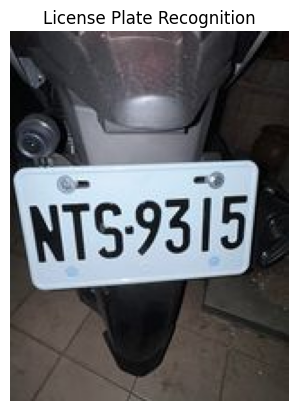

In [16]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Load the image
image = cv2.imread('car_plate_image.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use OpenCV's text detection to detect license plates
plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')
plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)

for (x, y, w, h) in plates:
    # Mark the position of the license plate in the image
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    plate_roi = gray[y:y + h, x:x + w]

    # Use EasyOCR to recognize the license plate text
    results = reader.readtext(plate_roi)

    for (bbox, text, prob) in results:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))

        # Draw the recognition result on the image
        cv2.putText(image, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

# Display the image with license plate recognition results using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('License Plate Recognition')
plt.axis('off')
plt.show()
plt.show()

